In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read csv file
cases = pd.read_csv("311_Cases.csv", sep = ",", dtype = "str")

# Drop extra columns
cases = cases.drop(cases.columns[range(20,47)], axis = 1)



####### Date Columns #####
date_columns = ["Opened", "Closed", "Updated"]

# Convert specified columns into datetime format
cases[date_columns] = cases[date_columns].apply(pd.to_datetime, format = "%m/%d/%Y %I:%M:%S %p")

# Find Closed - Opened in hours
time_elapsed = (cases["Closed"] - cases["Opened"])/np.timedelta64(1, 'h')

# Insert Time Elapsed into cases df
cases.insert(3, "Time Elapsed", time_elapsed)

cases = cases.dropna()



In [25]:
#Q4. Predict how long it takes for cases to be closed based on category of case
cases_q4 = cases.drop(cases.columns[range(11,20)], axis = 1)
cases_q4 = cases_q4.drop(['CaseID', 'Status Notes', 'Responsible Agency', 'Request Details', 'Media URL', 'Request Type'], axis = 1)
cases_q4

,Opened,Closed,Time Elapsed,Updated,Status,Category
5,2019-12-27 12:06:55,2020-05-15 10:23:01,3358.268333,2020-05-15 10:23:01,Closed,Sign Repair
7,2019-12-27 12:08:15,2019-12-27 15:00:48,2.875833,2019-12-27 15:00:48,Closed,Street and Sidewalk Cleaning
8,2019-12-27 12:07:17,2019-12-27 22:15:58,10.144722,2019-12-27 22:15:58,Closed,Graffiti
10,2019-12-27 12:10:00,2020-05-15 09:31:24,3357.356667,2020-05-15 09:31:24,Closed,Tree Maintenance
12,2019-12-27 12:17:00,2019-12-27 13:11:00,0.900000,2019-12-27 13:11:00,Closed,Street and Sidewalk Cleaning
...,...,...,...,...,...,...
1990,2020-07-15 07:21:41,2020-07-15 15:57:45,8.601111,2020-07-15 15:57:45,Closed,Street and Sidewalk Cleaning
1991,2020-07-15 07:21:00,2020-07-15 14:42:02,7.350556,2020-07-15 14:42:02,Closed,Street and Sidewalk Cleaning
1992,2020-07-15 07:20:00,2020-07-15 12:17:00,4.950000,2020-07-15 12:17:00,Closed,Street and Sidewalk Cleaning
1994,2020-04-10 15:54:00,2020-04-11 12:03:04,20.151111,2020-04-11 12:03:04,Closed,Graffiti


In [26]:
#Get dummies
category = pd.get_dummies(cases_q4['Category'],drop_first=True)
cases_q4 = pd.concat([cases_q4,category,request],axis=1)
cases_q4 = cases_q4.drop(['Category', 'Closed', 'Opened', 'Updated', 'Status'], axis = 1)
cases_q4

,Time Elapsed,Blocked Street or SideWalk,Damaged Property,Encampments,General Request - MTA,General Request - PUBLIC WORKS,Graffiti,Illegal Postings,Parking Enforcement,Rec and Park Requests,...,Streetlight - Light_Flickering_On_Off,Streetlight - Other,Transit_shelter_platform,Trees - Damaged_Tree,Trees - Damaging_Property,Trees - Overgrown_Tree,Trees - Tree_Other,complaint,other,request_for_service
5,3358.268333,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2.875833,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10.144722,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3357.356667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,0.900000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,8.601111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1991,7.350556,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1992,4.950000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1994,20.151111,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas import Series

In [29]:
X = cases_q4.loc[:,cases_q4.columns != 'Time Elapsed']
y = cases_q4['Time Elapsed']

In [30]:
#Splitting data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [49]:
#Fitting a Ridge Model
modelRidge = Ridge()
modelRidge.fit(X_train,y_train)
predRidge = modelRidge.predict(X_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(X_train, y_train))
print('Test accuracy:', modelRidge.score(X_test, y_test))
print('')

Coefficient of each feature: [ -421.00404657  -555.83035312  -586.5958343    -31.67432093
  -523.15506099  1199.20906475  -749.25754049  -891.91320807
  -143.13875027  -429.63721324  1538.53843665  1928.12708979
  1512.10381378  -863.2002715   -452.82605234   390.33936327
  -421.00404657  -157.12862734  -148.85597114  -156.29265512
  -191.05148074   -90.88719635  5881.79584339  -180.67724277
  -118.39099277  -256.76211758 -1304.29455432   -94.27734307
  -182.80458453  -403.79124977  -429.63721324  -160.64164261
 -1361.99813589   705.73986284 12461.68474946 -1956.94195714
  6202.58510661 -1515.45732449  -996.29709059 -1431.68697921
 -1074.48875726 -2112.66093661     0.         -1867.25501244
 -1848.82755839 -1503.30825042   539.75277052 -2078.38562125
   613.07454394 -1576.32034494  -140.84939759  -173.25450417
  -245.16435203  -155.85489908  -146.67364908  -201.56464029
  -173.63612759 -1706.49453981  -168.62577309  -721.78234122
   744.6056544   -165.96206345     0.          -166.7328

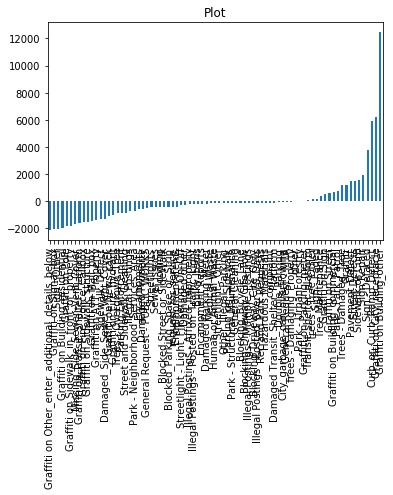

In [50]:
#Plot of variables vs coefficients
predictors = X_train.columns
coef = Series(modelRidge.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')


In [53]:
#Fitting a Lasso Model
modelLasso = Lasso()
modelLasso.fit(X_train,y_train)
predLasso = modelLasso.predict(X_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(X_train, y_train))
print('Test accuracy:', modelLasso.score(X_test, y_test))
print('')

Coefficient of each feature: [   -0.            -0.             0.             0.
   -92.06925632     0.          -180.49702884  -248.96599377
    94.07411106    -0.           166.78593529  2401.21859214
  3487.13775154  -215.60297684     0.          1119.61938523
    -0.            -0.            -0.            -0.
   -25.84829321    38.64754379  8922.9370107     -0.
     0.            -0.            -0.            -0.
    24.2227826   -130.59798581    -0.            -0.
     0.          2712.55024785 16426.92833172  -127.20914648
  9124.64508712    -0.             0.           396.80126614
    -0.          -157.16837947     0.           -52.16951808
   -68.49853274    -0.          2372.80005322  -162.05052747
  2595.13721461     0.            -0.            -0.
    -0.            -0.            -0.            -0.
    -0.            -0.            -0.          -152.0225716
  1320.57763599   279.1995341      0.            -0.
   478.17038472   591.55902423  4332.23892933     0.
 -2161.

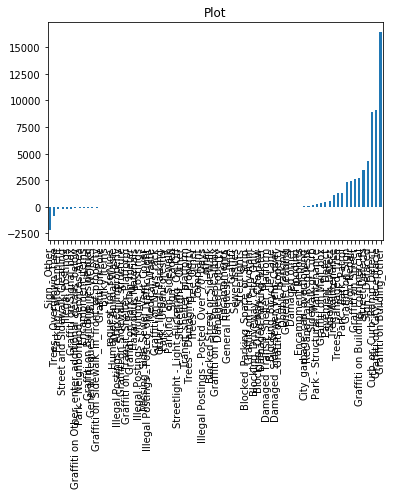

In [54]:
#Plot of variables vs coefficients
predictors = X_train.columns
coef = Series(modelLasso.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')